In [4]:
import os
import cv2

# Face Detection Parameters

In [2]:
face_cascade = cv2.CascadeClassifier('./library/haarcascade_frontalface_default.xml') # 얼굴 검출기
eye_cascade = cv2.CascadeClassifier('./library/haarcascade_eye.xml') # 눈 검출기
mouth_cascade = cv2.CascadeClassifier('./library/haarcascade_mcs_mouth.xml') # 입 검출기
nose_cascade = cv2.CascadeClassifier('./library/haarcascade_mcs_nose.xml') # 코 검출기

# Traing data set

In [2]:
parks = ['./park_training']
yoos = ['./yoo_training']
training_df = pd.read_csv('./training_facial_features.csv',\
                          names=['class', 'file_name','dist_eyes', 'dist_forehaed_to_nose', 'dist_nostril', 'nose_width', 'mouth_width'])
parks

['./park_training']

### Original images

In [5]:
tmp = []
for folder in parks:
    faces = os.walk(folder).next()[2]
    print ('number of training dataset: ', len(faces))
    for face in faces:
        img = cv2.imread('{}/{}'.format(folder, face))
        # gray-scale로 변환
        gray = cv2.cvtColor(img[29:len(img[0])-1, :], cv2.COLOR_BGR2GRAY)
        # 1차원 벡터로 변환
        img_vect = gray.flatten()
        tmp.append(img_vect)
dx1 = np.vstack(tmp)
dy1 = np.zeros(len(dx1))

('number of training dataset: ', 500)


In [18]:
len(dx1)

500

In [17]:
len(dy1)

500

In [14]:
gray

array([[202, 107,  87, ...,  49,  53,  40],
       [218, 127,  83, ...,  47,  47,  40],
       [225, 140,  80, ...,  44,  41,  39],
       ..., 
       [229, 229, 229, ..., 163, 158, 191],
       [229, 229, 229, ..., 161, 161, 196],
       [229, 229, 229, ..., 160, 157, 179]], dtype=uint8)

In [19]:
len(img_vect)

7000

In [12]:
face

'park_500.jpg'

In [10]:
len(img)

100

In [8]:
len(gray)

70

In [5]:
tmp = []
for folder in yoos:
    faces = os.walk(folder).next()[2]
    print ('number of training dataset: ', len(faces))
    for face in faces:
        img = cv2.imread('{}/{}'.format(folder, face))
        # gray-scale로 변환
        gray = cv2.cvtColor(img[29:len(img[0])-1, :], cv2.COLOR_BGR2GRAY)
        # 1차원 벡터로 변환
        img_vect = gray.flatten()
        tmp.append(img_vect)
dx2 = np.vstack(tmp)
dy2 = np.ones(len(dx2))

('number of training dataset: ', 500)


In [6]:
dX = np.vstack((dx1, dx2))
dy = np.hstack((dy1, dy2))

In [7]:
print ('park:', len(dy1), '/', 'yoo:', len(dy2))

('park:', 500, '/', 'yoo:', 500)


In [8]:
X_train_img = dX
y_train_img = dy[:, np.newaxis]

In [9]:
print ('number of rows:', len(X_train_img), '/', 'number of results:', len(y_train_img))

('number of rows:', 1000, '/', 'number of results:', 1000)


### Features by computer(PCA)

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 15개의 주된 얼굴만 추출
pca = PCA(n_components=15)
X_train_PCA = pca.fit_transform(X_train_img)
y_train_PCA = y_train_img

print ('number of training data set:',len(X_train_PCA))
# print (X_train_PCA.shape), print (X_train_img.shape)
# plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train_PCA, s=100, cmap=plt.cm.jet)
# plt.axis("equal")
# plt.show()

N=3; M=5;
fig = plt.figure(figsize=(10,3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((70,100)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])    
        plt.grid(False)

        
# 시각화
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d');
# ax.scatter(X_train_PCA[:,0], X_train_PCA[:,1], X_train_PCA[:,2], c=y_train_img, cmap=plt.cm.jet, s=15, alpha=1);
# ax.view_init(35, 70)
# plt.show()

('number of training data set:', 1000)


### Kernal PCA

In [11]:
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(kernel = 'rbf', fit_inverse_transform=True, gamma=10)
# kpca.fit(X_train_img)
# X_train_KPCA = kpca.transform(X_train_img)
# y_train_KPCA = y_train_img
# len(X_train_KPCA)

### Image Processing (features by human)

In [12]:
y_train_IP = training_df['class'].values[:, np.newaxis]
X_train_IP = training_df[[u'dist_eyes', u'dist_forehaed_to_nose', u'dist_nostril', u'nose_width', u'mouth_width']].values

In [13]:
y_train_IP = training_df['class'].values[:, np.newaxis]
X_train_IP = training_df[[u'dist_eyes', u'dist_nostril', u'nose_width', u'mouth_width']].values

In [14]:
print ('number of rows:', len(X_train_IP), '/', 'number of results:', len(y_train_IP))

('number of rows:', 1000, '/', 'number of results:', 1000)


# Test Data Set

In [15]:
park_test = ["./park_test"]
yoo_test = ["./yoo_test"]
test_df = pd.read_csv('./test_facial_features.csv',\
                          names=['class', 'file_name','dist_eyes', 'dist_forehaed_to_nose', 'dist_nostril', 'nose_width', 'mouth_width'])

### Original Images

In [16]:
tmp = []
for folder in park_test:
    faces = os.walk(folder).next()[2]
    for face in faces:
        img = cv2.imread('{}/{}'.format(folder, face))
        # gray-scale로 변환
        gray = cv2.cvtColor(img[29:len(img[0])-1, :], cv2.COLOR_BGR2GRAY)
        # 1차원 벡터로 변환
        img_vect = gray.flatten()
        tmp.append(img_vect)
dx1 = np.vstack(tmp)
dy1 = np.zeros(len(dx1))

In [17]:
tmp = []
for folder in yoo_test:
    faces = os.walk(folder).next()[2]
    for face in faces:
        img = cv2.imread('{}/{}'.format(folder, face))
        # gray-scale로 변환
        gray = cv2.cvtColor(img[29:len(img[0])-1, :], cv2.COLOR_BGR2GRAY)
        # 1차원 벡터로 변환
        img_vect = gray.flatten()
        tmp.append(img_vect)
dx2 = np.vstack(tmp)
dy2 = np.ones(len(dx2))

In [18]:
X_test_img = np.vstack((dx1, dx2))
y_test_img = np.hstack((dy1, dy2))[:, np.newaxis]
print (len(X_test_img), len(y_test_img))

(67, 67)


### PCA

In [19]:
X_test_PCA = pca.fit_transform(X_test_img)
y_test_PCA = y_test_img
print (len(X_test_PCA))

N=3; M=5;
fig = plt.figure(figsize=(10,3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((70,100)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])    
        plt.grid(False)

67


### KPCA

In [20]:
# X_test_KPCA = kpca.fit_transform(X_test_img)
# y_test_KPCA = y_test_img
# print (len(X_test_PCA))

### Image Processing

In [21]:
y_test_IP = test_df['class'].values[:, np.newaxis]
X_test_IP = test_df[[u'dist_eyes', u'dist_forehaed_to_nose', u'dist_nostril', u'nose_width', u'mouth_width']].values
print (len(X_test_IP))

30


In [22]:
y_test_IP = test_df['class'].values[:, np.newaxis]
X_test_IP = test_df[[u'dist_eyes', u'dist_nostril', u'nose_width', u'mouth_width']].values
print (len(X_test_IP))

30


# SVM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

### SVM for original images

In [24]:
%%time
svc_img = SVC(kernel='linear').fit(X_train_img, y_train_img)

c:\python27\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 2.02 s


### Parameter search for PCA

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


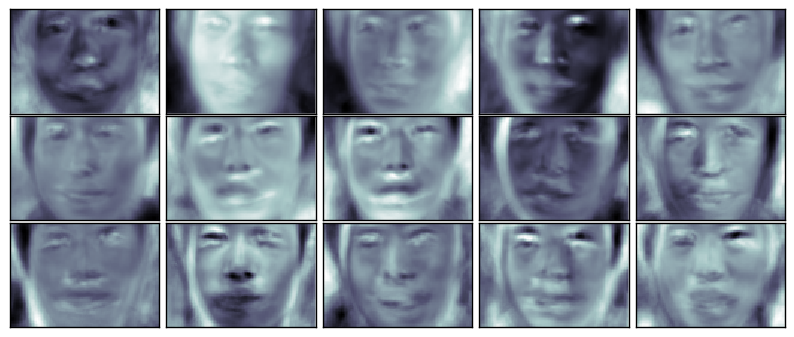

c:\python27\lib\site-packages\matplotlib\axes\_base.py:1322: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
c:\python27\lib\site-packages\matplotlib\image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


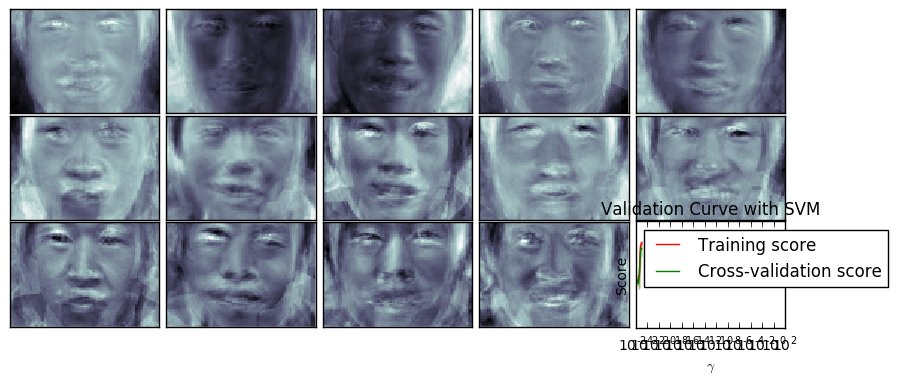

Wall time: 4.29 s


In [25]:
%%time
from sklearn.learning_curve import validation_curve
param_range = np.logspace(-24, -23, 20)

train_scores, test_scores = \
    validation_curve(SVC(kernel = 'rbf'), X_train_PCA, y_train_PCA.T[0], 
                     param_name="gamma", param_range=param_range,
                     cv=3, scoring="accuracy", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [26]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = np.logspace(-23.5, -23, 10)
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=4)
%time gs = gs.fit(X_train_PCA, y_train_PCA.T[0])

c:\python27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Wall time: 5.51 s


In [27]:
print(gs.best_score_)
print(gs.best_params_)

0.767
{'clf__C': 3.1622776601683795e-24, 'clf__kernel': 'linear'}


In [28]:
gs.grid_scores_

[mean: 0.76700, std: 0.09614, params: {'clf__C': 3.1622776601683795e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 3.5938136638046402e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 4.0842386526745175e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 4.6415888336127916e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 5.2749970637026091e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 5.9948425031894209e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 6.8129206905795944e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 7.7426368268112781e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 8.7992254356910383e-24, 'clf__kernel': 'linear'},
 mean: 0.76700, std: 0.09614, params: {'clf__C': 9.9999999999999996e-24, 'clf__kernel': 'linear'},
 mean: 0.5

### SVM for PCA

In [29]:
%%time
svc_pca = SVC(kernel='linear', C = 3.1623 * 10**-24).fit(X_train_PCA, y_train_PCA)

Wall time: 31 ms


### SVM for KPCA

In [30]:
# %%time
# svc_kpca = SVC(kernel='linear').fit(X_train_KPCA, y_train_KPCA)

### K-SVM for Image Processing

In [31]:
%%time
svc_ip = SVC(kernel='rbf').fit(X_train_IP, y_train_IP)

Wall time: 45 ms


### original image on SVM

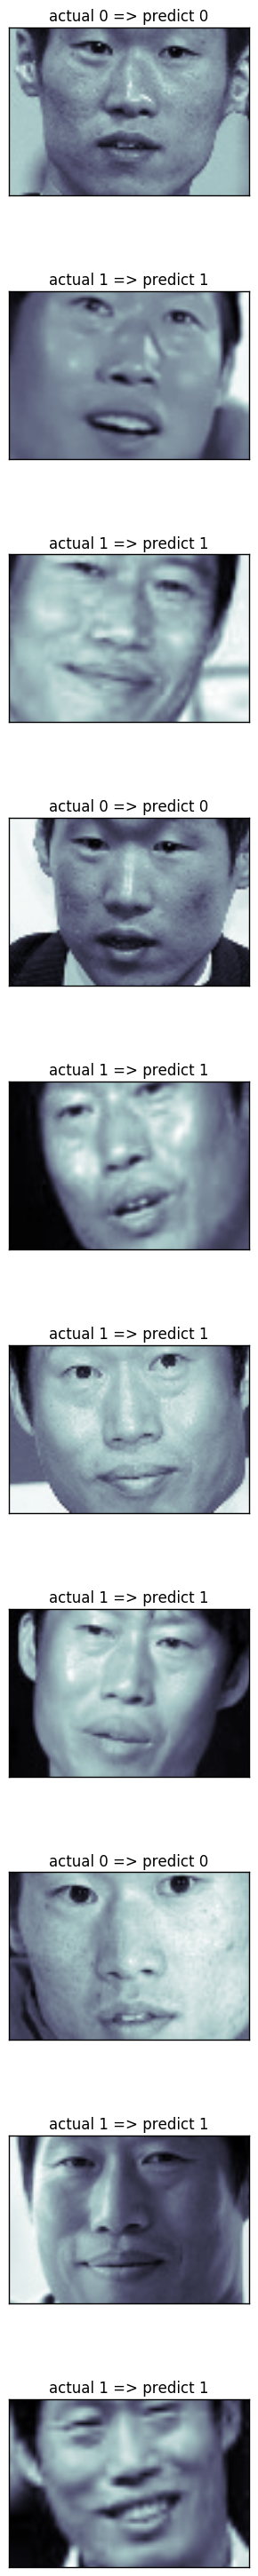

In [32]:
fig = plt.figure(figsize=(3,30))
for i, k in enumerate(np.random.choice(len(y_test_img), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test_img[k:(k+1), :].reshape(70,100), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("actual %d => predict %d" % (y_test_img[k], svc_img.predict(X_test_img[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [33]:
y_pred_img = svc_img.predict(X_test_img)
y_pred_train_img = svc_img.predict(X_train_img)
confusion_matrix(y_test_img, y_pred_img)
# 0: 박지성
# 1: 유해진
# 12 = 박지성을 박지성, 7 = 박지성을 유해진
# 0 = 유해진을 박지성, 15 = 유해진을 유해진

array([[30,  6],
       [ 2, 29]])

In [34]:
print(classification_report(y_test_img, y_pred_img))

             precision    recall  f1-score   support

        0.0       0.94      0.83      0.88        36
        1.0       0.83      0.94      0.88        31

avg / total       0.89      0.88      0.88        67



In [35]:
confusion_matrix(y_train_img, y_pred_train_img)

array([[500,   0],
       [  0, 500]])

In [36]:
print(classification_report(y_train_img, y_pred_train_img))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       500

avg / total       1.00      1.00      1.00      1000



### Features by Computer(PCA) on SVM

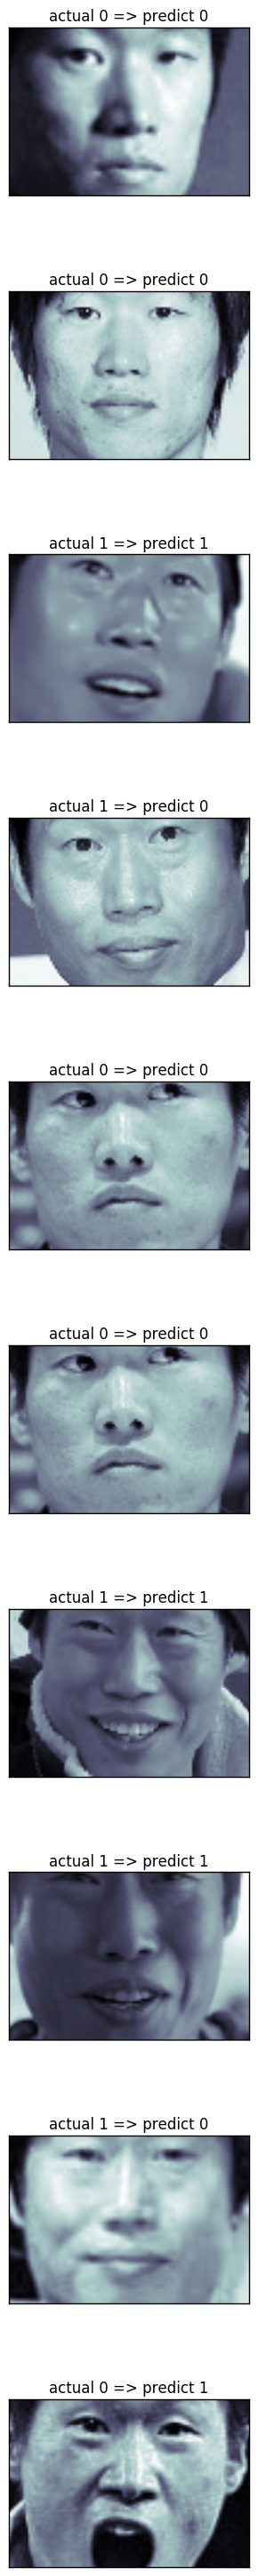

In [37]:
fig = plt.figure(figsize=(3,30))
for i, k in enumerate(np.random.choice(len(y_test_PCA), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test_img[k:(k+1), :].reshape(70,100), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("actual %d => predict %d" % (y_test_PCA[k], svc_pca.predict(X_test_PCA[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [38]:
y_pred_PCA = svc_pca.predict(X_test_PCA)
y_pred_train_PCA = svc_pca.predict(X_train_PCA)
confusion_matrix(y_test_PCA, y_pred_PCA)

array([[22, 14],
       [22,  9]])

In [43]:
print(classification_report(y_test_PCA, y_pred_PCA))

             precision    recall  f1-score   support

        0.0       0.50      0.61      0.55        36
        1.0       0.39      0.29      0.33        31

avg / total       0.45      0.46      0.45        67



In [44]:
confusion_matrix(y_train_PCA, y_pred_train_PCA)

array([[478,  22],
       [150, 350]])

In [45]:
print(classification_report(y_train_PCA, y_pred_train_PCA))

             precision    recall  f1-score   support

        0.0       0.76      0.96      0.85       500
        1.0       0.94      0.70      0.80       500

avg / total       0.85      0.83      0.83      1000



### Features by Computer(KPCA) on SVM

In [48]:
# fig = plt.figure(figsize=(3,30))
# for i, k in enumerate(np.random.choice(len(y_test_KPCA), 10)):
#     ax = fig.add_subplot(10, 1, i + 1)
#     ax.imshow(X_test_img[k:(k+1), :].reshape(70,100), cmap=plt.cm.bone);
#     ax.grid(False)
#     ax.xaxis.set_ticks([])
#     ax.yaxis.set_ticks([])
#     plt.title("actual %d => predict %d" % (y_test_KPCA[k], svc_kpca.predict(X_test_KPCA[k:(k+1), :])[0]))
# plt.tight_layout()
# plt.show()

In [49]:
# y_pred_KPCA = svc_kpca.predict(X_test_KPCA)
# y_pred_train_KPCA = svc_kpca.predict(X_train_KPCA)

In [ ]:
# confusion_matrix(y_test_KPCA, y_pred_KPCA)

In [ ]:
# print(classification_report(y_test_KPCA, y_pred_KPCA))

In [ ]:
# confusion_matrix(y_train_KPCA, y_pred_train_KPCA)

In [ ]:
# print(classification_report(y_train_KPCA, y_pred_train_KPCA))

### Features by Human(Image Processing) on K-SVM

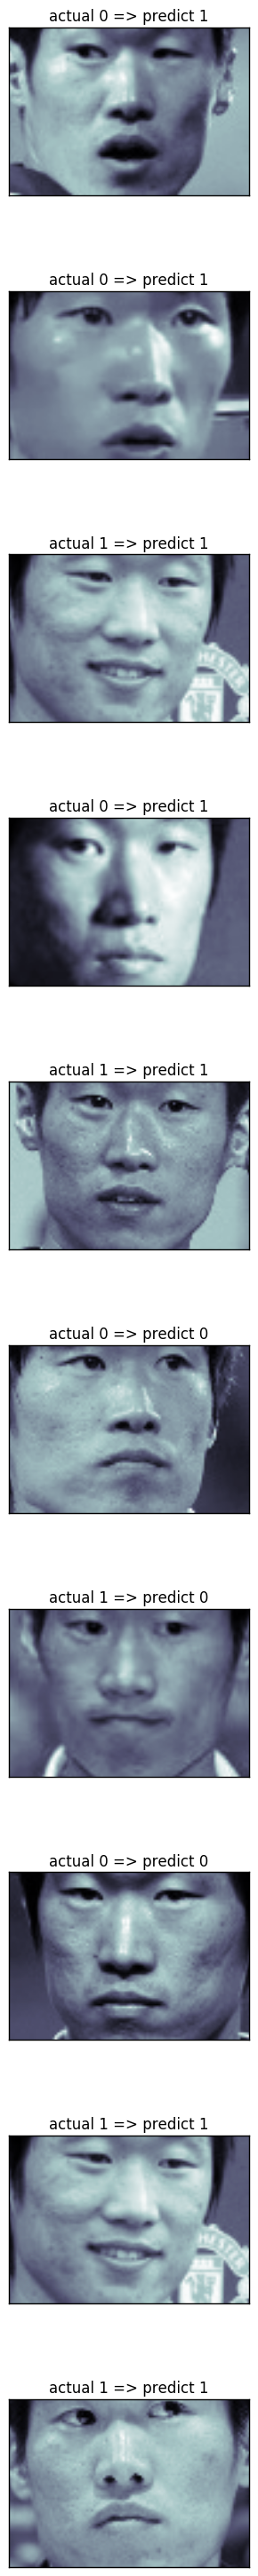

In [50]:
fig = plt.figure(figsize=(3,30))
for i, k in enumerate(np.random.choice(len(y_test_IP), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test_img[k:(k+1), :].reshape(70,100), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("actual %d => predict %d" % (y_test_IP[k], svc_ip.predict(X_test_IP[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [51]:
y_pred_IP = svc_ip.predict(X_test_IP)
y_pred_train_IP = svc_ip.predict(X_train_IP)

In [52]:
confusion_matrix(y_test_IP, y_pred_IP)

array([[ 8,  7],
       [ 1, 14]])

In [53]:
print(classification_report(y_test_IP, y_pred_IP))

             precision    recall  f1-score   support

          0       0.89      0.53      0.67        15
          1       0.67      0.93      0.78        15

avg / total       0.78      0.73      0.72        30



In [54]:
confusion_matrix(y_train_IP, y_pred_train_IP)

array([[470,  30],
       [ 26, 474]])

In [55]:
print(classification_report(y_train_IP, y_pred_train_IP))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94       500
          1       0.94      0.95      0.94       500

avg / total       0.94      0.94      0.94      1000



### Features by Human and Computer on K-SVM

In [60]:
X_train_PCAIP = np.hstack((X_train_PCA, X_train_IP))
y_train_PCAIP = y_train_IP

In [63]:
X_test_PCAIP = np.hstack((X_test_PCA, X_test_IP))
y_test_PCAIP = y_test_img

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [58]:
%%time
svc_pcaip = SVC(kernel='rbf', gamma = 10**-23).fit(X_train_PCAIP, y_train_PCAIP)

Wall time: 164 ms


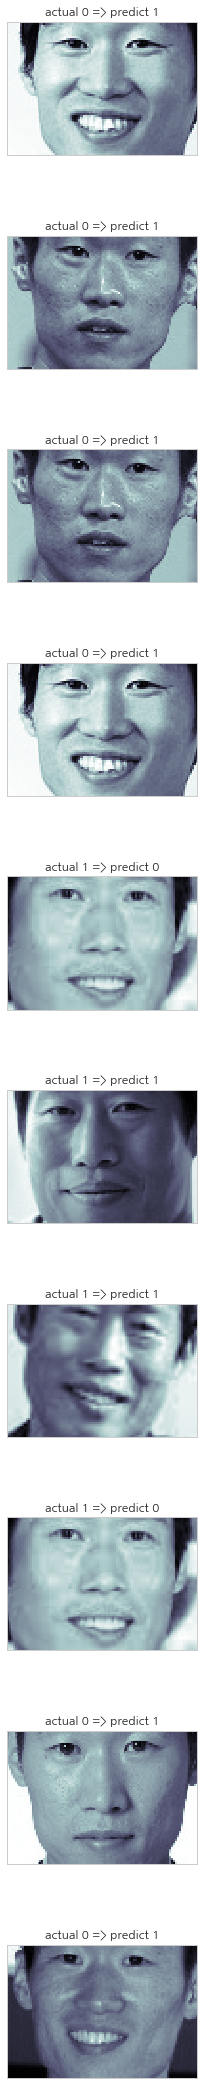

In [149]:
fig = plt.figure(figsize=(3,30))
for i, k in enumerate(np.random.choice(len(y_test_PCAIP), 10)):
    ax = fig.add_subplot(10, 1, i + 1)
    ax.imshow(X_test_img[k:(k+1), :].reshape(70,100), cmap=plt.cm.bone);
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title("actual %d => predict %d" % (y_test_PCAIP[k], svc_pcaip.predict(X_test_PCAIP[k:(k+1), :])[0]))
plt.tight_layout()
plt.show()

In [150]:
y_pred_PCAIP = svc_pcaip.predict(X_test_PCAIP)
y_pred_train_PCAIP = svc_pcaip.predict(X_train_PCAIP)
confusion_matrix(y_test_PCAIP, y_pred_PCAIP)

array([[ 6,  9],
       [ 2, 13]])

In [151]:
print(classification_report(y_test_PCAIP, y_pred_PCAIP))

             precision    recall  f1-score   support

          0       0.75      0.40      0.52        15
          1       0.59      0.87      0.70        15

avg / total       0.67      0.63      0.61        30



In [152]:
confusion_matrix(y_train_PCAIP, y_pred_train_PCAIP)

array([[400, 100],
       [ 34, 466]])

In [153]:
print(classification_report(y_test_PCAIP, y_pred_PCAIP))

             precision    recall  f1-score   support

          0       0.75      0.40      0.52        15
          1       0.59      0.87      0.70        15

avg / total       0.67      0.63      0.61        30



In [38]:
# from sklearn.svm import SVC
# from sklearn.learning_curve import validation_curve

# param_range = np.logspace(-6, -1, 10)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [79]:
# %%time
# train_scores, test_scores = \
#     validation_curve(SVC(), X_train, dy, 
#                      param_name="gamma", param_range=param_range,
#                      cv=10, scoring="accuracy", n_jobs=2)

In [47]:
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
# plt.xlabel("$\gamma$")
# plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
# plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2, color="r")
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2, color="g")
# plt.legend(loc="best")
# plt.show()

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

### Original Images

In [84]:
%%time
rf = ExtraTreesClassifier(max_depth = 10, n_estimators=7000, n_jobs=4).fit(X_train_img, y_train_img)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


CPU times: user 2min 7s, sys: 4.16 s, total: 2min 11s
Wall time: 44.5 s


In [85]:
y_pred_img = rf.predict(X_test_img)
print (len(X_test_img))

30


In [86]:
result = confusion_matrix(y_test_img, y_pred_img)
print (classification_report(y_test_img, y_pred_img))

             precision    recall  f1-score   support

        0.0       1.00      0.27      0.42        15
        1.0       0.58      1.00      0.73        15

avg / total       0.79      0.63      0.58        30



In [87]:
importances = rf.feature_importances_

In [88]:
importances = importances.reshape(70, 100)
importances

array([[  1.32453934e-04,   1.56134073e-04,   8.15357595e-05, ...,
          3.45860721e-05,   4.37657019e-05,   3.64096231e-05],
       [  2.18083359e-04,   1.15987933e-04,   1.12931874e-04, ...,
          5.54289478e-05,   4.46198232e-05,   4.02890075e-05],
       [  1.66903508e-04,   1.02067314e-04,   9.55695448e-05, ...,
          3.27963853e-05,   2.73850034e-05,   5.41087224e-05],
       ..., 
       [  1.44345839e-04,   1.47197032e-04,   1.42993675e-04, ...,
          8.06351760e-05,   8.73450622e-05,   1.80525405e-04],
       [  1.17392875e-04,   1.11918538e-04,   1.07096815e-04, ...,
          1.32844839e-04,   1.05078771e-04,   1.22319424e-04],
       [  8.07848123e-05,   6.06976257e-05,   9.84125906e-05, ...,
          9.55800244e-05,   1.54050096e-04,   6.66272074e-05]])

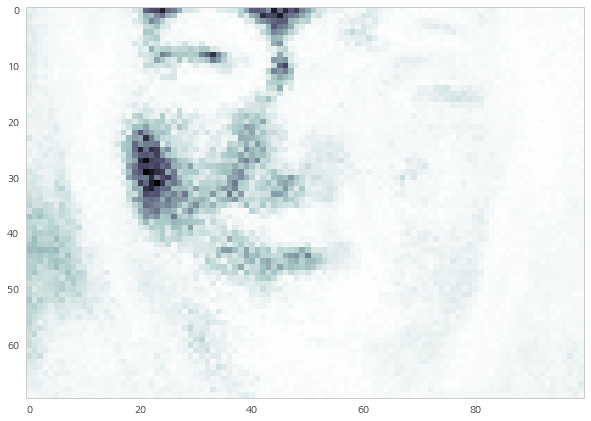

In [89]:
plt.figure(figsize = (10, 10))
plt.imshow(importances, cmap = plt.cm.bone_r)
plt.grid(False)
plt.show()

## Logistic Regression

In [48]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import clone
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
model = LogisticRegression().fit(X_train_IP, y_train_IP)

In [51]:
logit_mod = sm.Logit(y_test_IP, X_test_IP)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.2458
Time:                        10:26:58   Log-Likelihood:                -15.683
converged:                       True   LL-Null:                       -20.794
                                        LLR p-value:                   0.01677
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1563      0.104     -1.500      0.134      -0.361       0.048
x2             0.2405      0.152      1.585      0.113      -0.057       0.538
x3            -0.3479      0.204     -1.707      0.0

### Decision Tree

In [52]:
import StringIO
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=[u'dist_eyes', u'dist_forehaed_to_nose', u'dist_nostril', u'nose_width', u'mouth_width'])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, classifier, title):
    resolution=0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X_train_IP, y_train_IP)

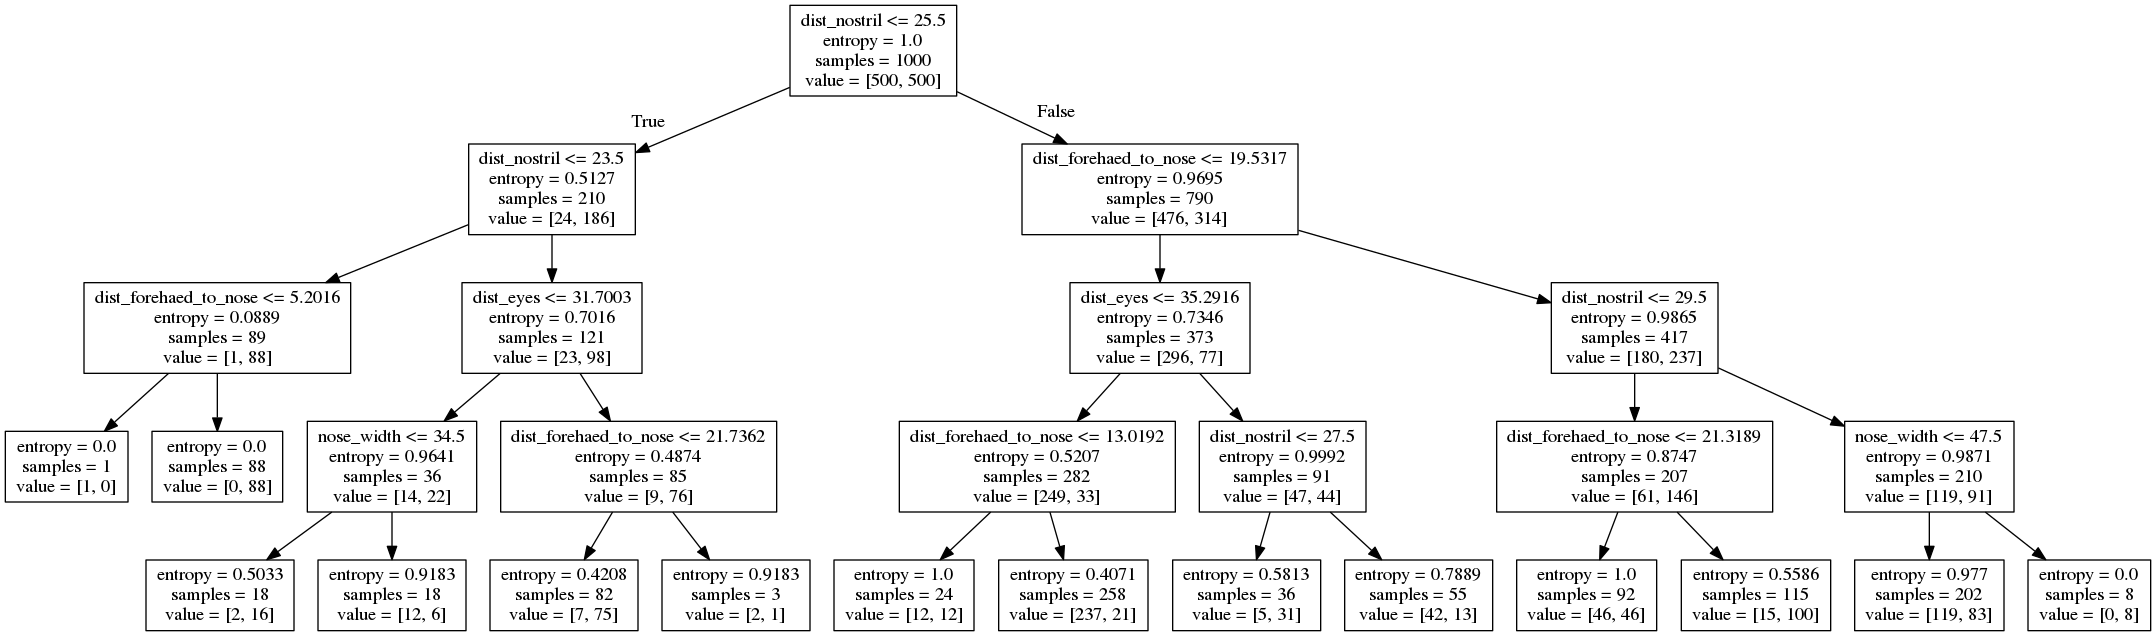

In [54]:
draw_decision_tree(tree1)